# Python Homework 5: Financial Credit Rating

<font color="blue"><b>Instruction:</b> Please upload your jupyter notebook on GauchoSpace with filename "PythonHW5_<i>YOURPERMNUMBER</i>.ipynb".</font>


In Mathematical Finance, Markov chains are typically used to model the default risk of a company or country (more specifically, the default of a company's or country's liability like a corporate or government bond - see PSTAT 171 and PSTAT 170). 

Rating agencies (like <i>Standard & Poor’s</i>, <i>Moody’s</i>, <i>Fitch</i>) rate the financial stability of a company and classify them according to different classes. A possible classification may range from 'AAA' for debitors with a very good credit rating to 'CCC' for debitors which are very likely to delay in paying a debt; and 'D' for those debitors which can't satisfy their financial liabilities anymore (in other words, they are default). 

The yearly credit rating of a company can be modeled as a Markov chain $(X_n)_{n=0,1,2,\ldots}$ with state space


$$ \mathcal{S} = \{ AAA,\, AA,\, A,\, BBB,\, BB,\, B,\, CCC,\, D \} $$

where $X_n$ represents the credit rating class of a company at the $n$-th year. The transition probabilities are given by

\begin{equation*}
\begin{array}{ccccccccc}
 & AAA & AA & A & BBB & BB & B & CCC & D \\
 AAA & 92,07 & 7,09 & 0,63 & 0,15 & 0,06 & 0,00 & 0,00 & 0,00 \\ 
 AA & 0,62 & 90,84 & 7,76 & 0,59 & 0,06 & 0,10 & 0,02 & 0,01 \\
 A & 0,05 & 2,09 & 91,38 & 5,79 & 0,44 & 0,16 & 0,04 & 0,05 \\
 BBB & 0,03 & 0,21 & 4,10 & 89,37 & 4,82 & 0,86 & 0,24 & 0,37 \\
 BB & 0,03 & 0,08 & 0,40 & 5,54 & 83,24 & 8,15 & 1,11 & 1,45 \\
 B & 0,00 & 0,08 & 0,27 & 0,34 & 5,39 & 82,41 & 4,92 & 6,59 \\
 CCC & 0,10 & 0,00 & 0,29 & 0,58 & 1,55 & 10,54 & 52,80 & 34,14 \\
 D & 0,00 & 0,00 & 0,00 & 0,00 & 0,00 & 0,00 & 0,00 & 100,0
\end{array} 
\end{equation*}

<i>Remark</i>: For your implementations below, you can label the different states from $0$ to $7$, where $0$ represents state $AAA$, $1$ represents state $AA$, and so on.

As usual, we start with loading some packages:

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import csv

# Allows to render plots directly within the notebook
%matplotlib inline

## Problem 1 (3 points)

We start with loading the matrix from the accompanying external .csv-file.

In [4]:
csvFile = 'CreditRatingTransMatrixP.csv'   #specify the path to your csv file

P = []
with open( csvFile, 'r' ) as file:
    reader = csv.reader( file )
    for row in reader:
        P.append( [ float( prob ) for prob in row ] )

P is a list representing the transition probability matrix. In particular, $P[i][j]$ gives you the probabilities from state $i$ to $j$, for $i,j\in\{0,1,2,\dots, 7\}$. There are many other ways to read and store the transition matrix, e.g., you could also try 'pandas'.

In [5]:
### Check if you uploaded matrix P correctly
P

[[0.9207, 0.0709, 0.0063, 0.0015, 0.0006, 0.0, 0.0, 0.0],
 [0.0062, 0.9084, 0.0776, 0.0059, 0.0006, 0.001, 0.0002, 0.0001],
 [0.0005, 0.0209, 0.9138, 0.0579, 0.0044, 0.0016, 0.0004, 0.0005],
 [0.0003, 0.0021, 0.041, 0.8937, 0.0482, 0.0086, 0.0024, 0.0037],
 [0.0003, 0.0008, 0.004, 0.0554, 0.8324, 0.0815, 0.0111, 0.0145],
 [0.0, 0.0008, 0.0027, 0.0034, 0.0539, 0.8241, 0.0492, 0.0659],
 [0.001, 0.0, 0.0029, 0.0058, 0.0155, 0.1054, 0.528, 0.3414],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]

In [7]:
### E.g. probabilities from state 0 to 0, 1, ..., 7
P[0]# first [] point to row index, second[] point to column index

[0.9207, 0.0709, 0.0063, 0.0015, 0.0006, 0.0, 0.0, 0.0]

<b>Question:</b> Use suitable Matrix operations to <u>compute the probability</u> that a company which is rated with 'AAA' today will <u>not</u> default during the next 8 years. Give a short explanation to your answer!

In [10]:
### Provide your computations here

np.set_printoptions(precision=4, suppress=True)
np.linalg.matrix_power(P, 8)

array([[0.5239, 0.3113, 0.1215, 0.0308, 0.007 , 0.0032, 0.0006, 0.0018],
       [0.0278, 0.4979, 0.3405, 0.0964, 0.0186, 0.0099, 0.0018, 0.0071],
       [0.0048, 0.0932, 0.5523, 0.2469, 0.0554, 0.0239, 0.0043, 0.0192],
       [0.0023, 0.0234, 0.1771, 0.4807, 0.1599, 0.0746, 0.0125, 0.0696],
       [0.0016, 0.0082, 0.0495, 0.1819, 0.307 , 0.2063, 0.0314, 0.214 ],
       [0.0007, 0.0047, 0.0193, 0.0492, 0.135 , 0.2822, 0.0433, 0.4656],
       [0.0015, 0.0023, 0.0103, 0.0219, 0.0449, 0.0931, 0.0192, 0.8068],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 1.    ]])

Provide your short explanation here:

<b>Answer:</b>  By computing the probability transfer matrix, we get the probability that a company which is rated with 'AAA' today will not default during the next 8 years is $P$=1-$P_{07}^{8}$=1-0.0018=0.9982

## Problem 2 (4 points)

Write a Python code to simulate the Markov chain for different starting values:

<i>Hint:</i> You can use the numpy built-in function <tt>random.choice()</tt>!

In [20]:
def simulateRating(startRating, numberOfSteps, P):
    
    # Insert your code here
    samplePath = [startRating]
    curP = P[startRating]

    for i in range(numberOfSteps):
        nextV = np.random.choice(8, p=curP)
        samplePath.append(nextV)
        curP = P[nextV]
        
    return samplePath

In [21]:
### Test your code here:
simulateRating(startRating=0, numberOfSteps=10, P=P)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## Problem 3 (3 points)

Write a code to plot <tt>numPaths</tt> simulated paths of length <tt>lengthPath</tt> with starting value <tt>startRating</tt>.

In [22]:
### Write your own code here to simulate the paths

startRating = 2            
lengthPath = 50
numPaths = 2

### Insert your code here
def multiSimulateRating(startRating, numberOfSteps, numPaths, P):
    samplePaths = []
    for _ in range(numPaths):
        samplePaths.append(simulateRating(startRating, numberOfSteps, P))
    return samplePaths

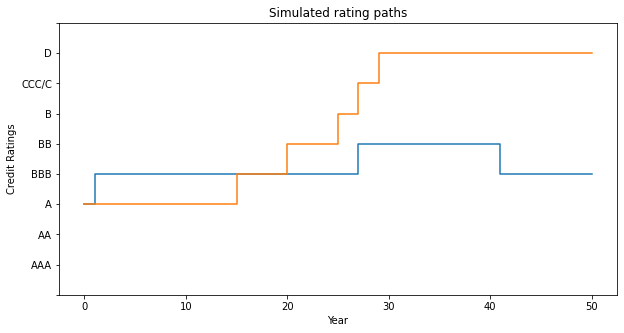

In [23]:
### Complement the plot commands accordingly and plot your results

def plotPaths(startRating, lengthPath, numPaths, P):
    plt.figure(figsize=(10, 5))

    simPaths = multiSimulateRating(startRating, lengthPath, numPaths, P)
    for path in simPaths:
        plt.plot(np.arange(lengthPath+1), path, drawstyle='steps')

    plt.title('Simulated rating paths')

    plt.ylabel('Credit Ratings')
    plt.xlabel('Year')

    plt.ylim(-1, 8)
    ratings = ['', 'AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC/C', 'D', '']
    plt.yticks(range(-1, 9), ratings)
    plt.show()

plotPaths(startRating, lengthPath, numPaths, P)

## Problem 4 (for fun)

Can you say something about the long run behavior of the Markov chain? Does it depend on today's starting rate at time $0$?

Justify your answer with a plot and/or computations!

<b>Answer</b>: most companies are likly to bankrupt in the long run, which is inline with Law of Entropy. It dies not depend on inital state

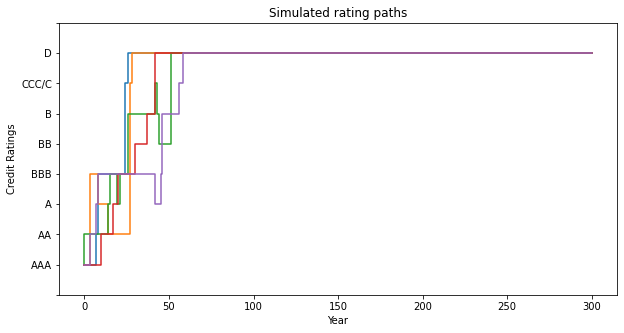

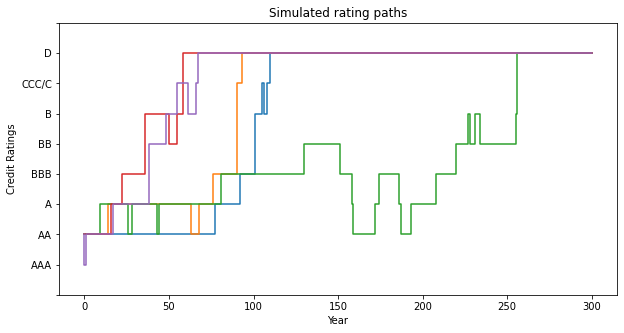

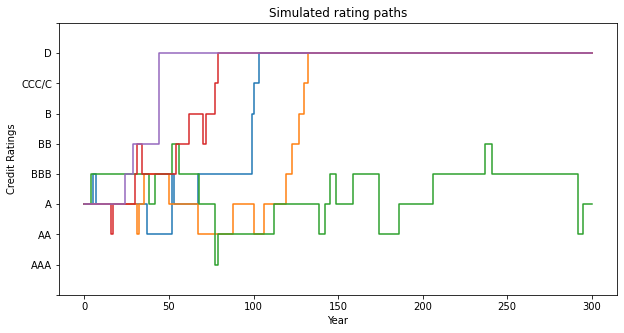

In [24]:
### Provide your computations here
plotPaths(0, 300, 5, P)
plotPaths(1, 300, 5, P)
plotPaths(2, 300, 5, P)
